# Back tracking

https://www.geeksforgeeks.org/backtracking-algorithms/

Backtracking is an algorithmic-technique for solving problems recursively by trying to build a solution incrementally, one piece at a time, removing those solutions that fail to satisfy the constraints of the problem at any point of time (by time, here, is referred to the time elapsed till reaching any level of the search tree).

For example, consider the SudoKo solving Problem, we try filling digits one by one. Whenever we find that current digit cannot lead to a solution, we remove it (backtrack) and try next digit. This is better than naive approach (generating all possible combinations of digits and then trying every combination one by one) as it drops a set of permutations whenever it backtracks.

## Sudoku Solver
https://leetcode.com/problems/sudoku-solver/

Write a program to solve a Sudoku puzzle by filling the empty cells.

A sudoku solution must satisfy all of the following rules:

Each of the digits 1-9 must occur exactly once in each row.
Each of the digits 1-9 must occur exactly once in each column.
Each of the the digits 1-9 must occur exactly once in each of the 9 3x3 sub-boxes of the grid.
Empty cells are indicated by the character '.'.


A sudoku puzzle...
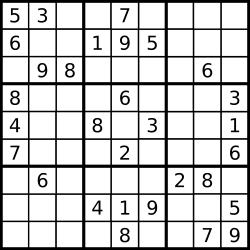

...and its solution numbers marked in red.

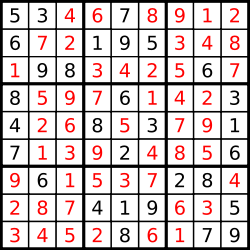

Note:

The given board contain only digits 1-9 and the character '.'.
You may assume that the given Sudoku puzzle will have a single unique solution.
The given board size is always 9x9.

https://www.geeksforgeeks.org/sudoku-backtracking-7/

In [ ]:
class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        all_nums = [str(num) for num in range(1, 10)]
                    
        def get_nums(i, j):
            col_nums = [board[ridx][j] for ridx in range(9)]
            row_nums = [board[i][cidx] for cidx in range(9)]
            square_nums = [board[ridx][cidx] for ridx in range((i//3)*3, (i//3)*3+3) for cidx in range((j//3)*3, (j//3)*3+3)]
            existing_nums = set(col_nums + row_nums + square_nums)
            return [num for num in all_nums if num not in existing_nums]            
        
        def try_a_num(i, j):
            if i>8:
                return True
            if board[i][j] == '.':
                nums = get_nums(i, j)
                if len(nums)==0:
                    return False
                for num in nums:
                    board[i][j] = num #don't need to check if this num is valid
                    next_j = j+1 if j<8 else 0
                    next_i = i if j<8 else i+1
                    if try_a_num(next_i, next_j):
                        #print(i, j, board[i])
                        return True
                    else:
                        board[i][j] = '.'

                if board[i][j] == '.':
                    return False
            else:
                next_j = j+1 if j<8 else 0
                next_i = i if j<8 else i+1
                return try_a_num(next_i, next_j)
            
        try_a_num(0, 0)
            
                        
                        
                     
                    
        


## 39. Combination Sum
https://leetcode.com/problems/combination-sum/
Given a set of candidate numbers (candidates) (without duplicates) and a target number (target), find all unique combinations in candidates where the candidate numbers sums to target.

The same repeated number may be chosen from candidates unlimited number of times.

Note:

All numbers (including target) will be positive integers.
The solution set must not contain duplicate combinations.
Example 1:

Input: candidates = [2,3,6,7], target = 7,
A solution set is:
[
  [7],
  [2,2,3]
]
Example 2:

Input: candidates = [2,3,5], target = 8,
A solution set is:
[
  [2,2,2,2],
  [2,3,3],
  [3,5]
]

In [ ]:
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        '''
        #Backtracking
        Runtime: 132 ms, faster than 22.61% 
Memory Usage: 13.9 MB, less than 5.58% 
        '''
       
        all_comb = []
        n = len(candidates)
        def find_comb_with_backtrack(curr_idx, curr_sum, curr_comb):
            #print(myc, curr_idx, curr_sum, curr_comb)
            myc += 1
            if curr_idx >= n:
                #print('exceeding n')
                return
            if curr_sum > target:
                #print('larger')
                return
            if curr_sum == target:
                #print(all_comb)
                all_comb.append(curr_comb)
                #print(all_comb)
                return 
                
            #if curr_sum < target
            find_comb_with_backtrack(curr_idx, curr_sum + candidates[curr_idx], curr_comb + [candidates[curr_idx]])
            #print("--")
            find_comb_with_backtrack(curr_idx + 1, curr_sum, curr_comb)
            
        
        find_comb_with_backtrack(0, 0, [])
        return all_comb

In [ ]:
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
    # Binary search
    # Runtime: 56 ms (much better than Backtracking)
    # Memory Usage: 13.9 MB
        def find_comb(lo, hi, target, result):
            #print(all_comb, lo, hi, target, result)
            if candidates[lo] > target:
                return
            elif candidates[lo] == target:
                all_comb.append(result + [candidates[lo]])
            else: # candidates[lo] < target 
                if candidates[hi] == target:
                    all_comb.append(result + [candidates[hi]])
                    new_hi_lim = hi
                elif candidates[hi] < target:
                    new_hi_lim = hi
                else:
                    lo_idx, hi_idx = lo, hi
                    while lo_idx < hi_idx:
                        mid = (lo_idx + hi_idx)//2
                        if candidates[mid] < target:
                            lo_idx = mid + 1
                        elif candidates[mid] == target:
                            all_comb.append(result + [candidates[mid]])
                            new_hi_lim = mid
                            break
                        else: #candidates[mid] > target
                            hi_idx = mid
                        
                    if lo_idx == hi_idx: # while-loop ends without having candidates[mid] == target
                        new_hi_lim = lo_idx if candidates[lo_idx] < target else lo_idx - 1
                    
                for idx in range(lo, new_hi_lim + 1):
                    val = candidates[idx]
                    #print('--', idx, '--', lo, hi, target, val, result)
                    find_comb(idx, new_hi_lim, target - val, result + [val])
                
                
        
        n = len(candidates)
        if n == 0:
            return []
            
        candidates = sorted(candidates)
        
        all_comb = []
        lo, lim_hi = 0, n - 1
        
        if candidates[lo] > target:
            return all_comb
        elif candidates[lo] == target:
            return [[candidates[lo]]]
            
        while candidates[lim_hi] > target:
            lim_hi -= 1
        
        if candidates[lim_hi] == target:
            all_comb.append([candidates[lim_hi]])
            lim_hi -= 1
                
        # At reaching here, candidates[hi] < target and candidates[lo] < target
        for k in range(lo, lim_hi + 1):
            find_comb(k, lim_hi, target - candidates[k], [candidates[k]])
            
            
        return all_comb   

## 40. Combination Sum II
https://leetcode.com/problems/combination-sum-ii/

Given a collection of candidate numbers (candidates) and a target number (target), find all unique combinations in candidates where the candidate numbers sums to target.

Each number in candidates may only be used once in the combination.

Note:

All numbers (including target) will be positive integers.
The solution set must not contain duplicate combinations.
Example 1:

Input: candidates = [10,1,2,7,6,1,5], target = 8,
A solution set is:
[
  [1, 7],
  [1, 2, 5],
  [2, 6],
  [1, 1, 6]
]
Example 2:

Input: candidates = [2,5,2,1,2], target = 5,
A solution set is:
[
  [1,2,2],
  [5]
]

### Backtrackingmethod
Runtime: 324 ms
Memory Usage: 13.8 MB

In [ ]:
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        '''
        # Backtracking 
        '''
        all_comb = set()
        n = len(candidates)
        def find_combSum_backtracking(idx, s, comb):
            #print(idx, s, comb)
            if s == target:
                all_comb.add(tuple(sorted(comb)))
                #print('*', all_comb)
                return
            elif s > target:
                return
            #else:# s < target
            if idx >= n: # we have to check for this condition after the above conditions
                        # because the above sum s and comb are for including 
                        # candidates[idx-1] (not candidates[idx])
                        # candidates[idx] is included into the sum and comb in the
                        # following line, so we only starts checking its value here
                return
            find_combSum_backtracking(idx + 1, s + candidates[idx], comb + [candidates[idx]])
            #print('--')
            find_combSum_backtracking(idx + 1, s, comb)
            
        find_combSum_backtracking(0, 0, [])
        all_comb = [list(temp) for temp in all_comb]
        return all_comb

### Binary search method
Runtime: 52 ms, faster than 84.83% of Python3 online submissions for Combination Sum II.
Memory Usage: 14.1 MB, less than 5.10% 

In [ ]:
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        
        '''
        # Binary search method
        '''
        n = len(candidates)
        if n == 0:
            return []
        candidates = sorted(candidates)
        #print(candidates)
        
        all_comb = []
        
        def find_lowest_idx(lo, hi, target):
            #print("find idx", lo, hi, target)
            if candidates[hi] <= target:
                return hi
            while lo < hi:
                mid = (lo + hi)//2
                if candidates[mid] == target:
                    return mid
                elif candidates[mid] < target:
                    lo = mid + 1
                else: #candidates[mid] > target
                    hi = mid
            return lo - 1
        
        def find_comb(curr_sum, lo, hi, curr_comb):
            #print(lo, hi, curr_sum, curr_comb)
            if curr_sum > target:
                return
            elif curr_sum == target:
                all_comb.append(curr_comb)
                #print("**", all_comb)
                return
            #curr_sum < target
            # find the smallest idx that greater than target
            new_hi_lim = find_lowest_idx(lo, hi, target - curr_sum)
            #print('new_hi', new_hi_lim)
            new_comb = [] # dummy initialization
            for i in range(lo, new_hi_lim + 1):
                # avoid repeating the same combination due to the equal elements in candidates
                if new_comb == curr_comb + [candidates[i]]:
                    continue
                new_comb = curr_comb + [candidates[i]]
                find_comb(curr_sum + candidates[i], i + 1, new_hi_lim, new_comb)
                curr_comb = new_comb[:-1]
            
            
        for idx in range(n):
            if idx != 0 and candidates[idx - 1]== candidates[idx]:
                continue
            #print('++', idx)
            find_comb(candidates[idx], idx + 1, n - 1, [candidates[idx]])
                
        return all_comb

In [4]:
s = b'11'
print(int(s, base=2))

3
